In [1]:
import os
path = os.path.abspath(os.path.join('..','..','..'))
import sys
sys.path.append(path)
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import folium
from pyproj import Proj, transform, CRS, Transformer
import pyvista as pv
from reservoirpy.wellpy import path as ph


## Import data from csv

In [2]:
os.listdir()

['.~lock.info.xlsx#',
 '.ipynb_checkpoints',
 'header.csv',
 'tvdss_tops.csv',
 'md_tops.csv',
 'field.ipynb',
 'surveys.csv',
 'perf.csv',
 'info.xlsx']

In [3]:
header = pd.read_csv('header.csv')
tops = pd.read_csv('md_tops.csv')
perf = pd.read_csv('perf.csv')
surveys = pd.read_csv('surveys.csv')


In [4]:
header = header.set_index('well_name')
header.head()

,surf_easting,surf_northing,bottom_easting,bottom_northing,gle,elevation_reference,td,last_formation,last_workover
well_name,,,,,,,,,
FL-1,900350.00,1048000.00,900350.00,1048000.00,576.81,DF,10710.0,Paleozoico,NaN
FL-2P,900452.65,1046822.27,900452.70,1046822.30,578.10,DF,12960.5,Basamento,5/1/2009
FL-3,901338.07,1048624.07,901338.10,1048624.10,569.38,DF,10127.0,NaN,NaN
FL-3ST,901338.00,1048624.10,901170.37,1048634.36,573.88,DF,9400.0,NaN,8/1/2009
FL-4,900888.20,1047497.15,900894.17,1047505.40,570.10,DF,9900.0,NaN,3/1/2012


In [5]:
tops1 = pd.melt(tops, id_vars='well',var_name='formation',value_name='md_top')
tops1 = tops1[~tops1['md_top'].isnull()]
tops1.head()

,well,formation,md_top
0,FL-1,leon,6255.50
1,FL-2P,leon,6250.00
2,FL-3,leon,6253.00
4,FL-4,leon,6234.00
5,FL-5,leon,6391.18


In [6]:
perf.head()

,well,md_top,md_bottom
0,FL-1,9014,9022
1,FL-2P,8982,8984
2,FL-2P,8991,8996
3,FL-2P,9001,9010
4,FL-2P,9061,9065


In [7]:
surveys.head()

,well,md,inc,azi
0,FL-1,0.0,0.0,0.0
1,FL-1,10710.0,0.0,0.0
2,FL-2P,0.0,0.0,0.0
3,FL-2P,12960.0,0.0,0.0
4,FL-3,0.0,0.0,0.0


## Create the wells group and wells through a for loop

In [8]:
wells_list = header.index.unique()
wells_list

Index(['FL-1', 'FL-2P', 'FL-3', 'FL-3ST', 'FL-4', 'FL-5', 'FL-6', 'FL-7ST',
       'FL-8', 'FL-9', 'FL-10', 'FL-11', 'FL-12', 'FL-13', 'FL-14', 'FL-15',
       'FL-16', 'FL-17', 'FL-18'],
      dtype='object', name='well_name')

In [9]:
# Create the wells group

fl = ph.wells_group()

for i in wells_list:
    print(i)
    _tops = ph.tops(tops1.loc[tops1['well']==i,['formation','md_top']])
    _perf = ph.perforations(perf.loc[perf['well']==i,['md_top','md_bottom']])
    
    _well = ph.well(name = i, 
                     rte = header.loc[i,'gle'],
                     crs = "EPSG:3117",
                     surf_coord = header.loc[i,['surf_easting','surf_northing']].tolist(), 
                     survey = surveys.loc[surveys['well']==i,['md','inc','azi']],
                     tops = _tops,
                     perforations = _perf
                     )
    fl.add_well(_well)
fl.describe()

FL-1
FL-2P
FL-3


divide by zero encountered in true_divide
invalid value encountered in multiply


FL-3ST
FL-4
FL-5
FL-6
FL-7ST
FL-8
FL-9
FL-10
FL-11
FL-12
FL-13
FL-14
FL-15
FL-16
FL-17
FL-18


,rte,surf_coord,crs,survey,perforations,tops,openlog,masterlog,caselog
FL-1,576.81,POINT (900350.000 1048000.000),EPSG:3117,True,True,True,False,False,False
FL-2P,578.10,POINT (900452.650 1046822.270),EPSG:3117,True,True,True,False,False,False
FL-3,569.38,POINT (901338.070 1048624.070),EPSG:3117,True,True,True,False,False,False
FL-3ST,573.88,POINT (901338.000 1048624.100),EPSG:3117,True,True,True,False,False,False
FL-4,570.10,POINT (900888.200 1047497.150),EPSG:3117,True,True,True,False,False,False
FL-5,572.26,POINT (900007.240 1046125.780),EPSG:3117,True,True,True,False,False,False
FL-6,568.76,POINT (899993.190 1046124.110),EPSG:3117,True,True,True,False,False,False
FL-7ST,571.00,POINT (900887.990 1047475.410),EPSG:3117,True,True,True,False,False,False
FL-8,568.76,POINT (899993.190 1046110.910),EPSG:3117,True,True,True,False,False,False
FL-9,568.81,POINT (899986.290 1046015.110),EPSG:3117,True,True,True,False,False,False


In [10]:
fl.wells_distance(wells=['FL-1','FL-11'])

,FL-1,FL-11
FL-1,0.000000,762.652825
FL-11,762.652825,0.000000


In [11]:
fl.wells_map(zoom=14,wells=['FL-3','FL-6'])

In [12]:
fl.formation_distance(wells=['FL-3','FL-6'],formation='main_ubaque')

well,FL-3,FL-6
well,,
FL-3,0.000000,2090.750229
FL-6,2090.750229,0.000000


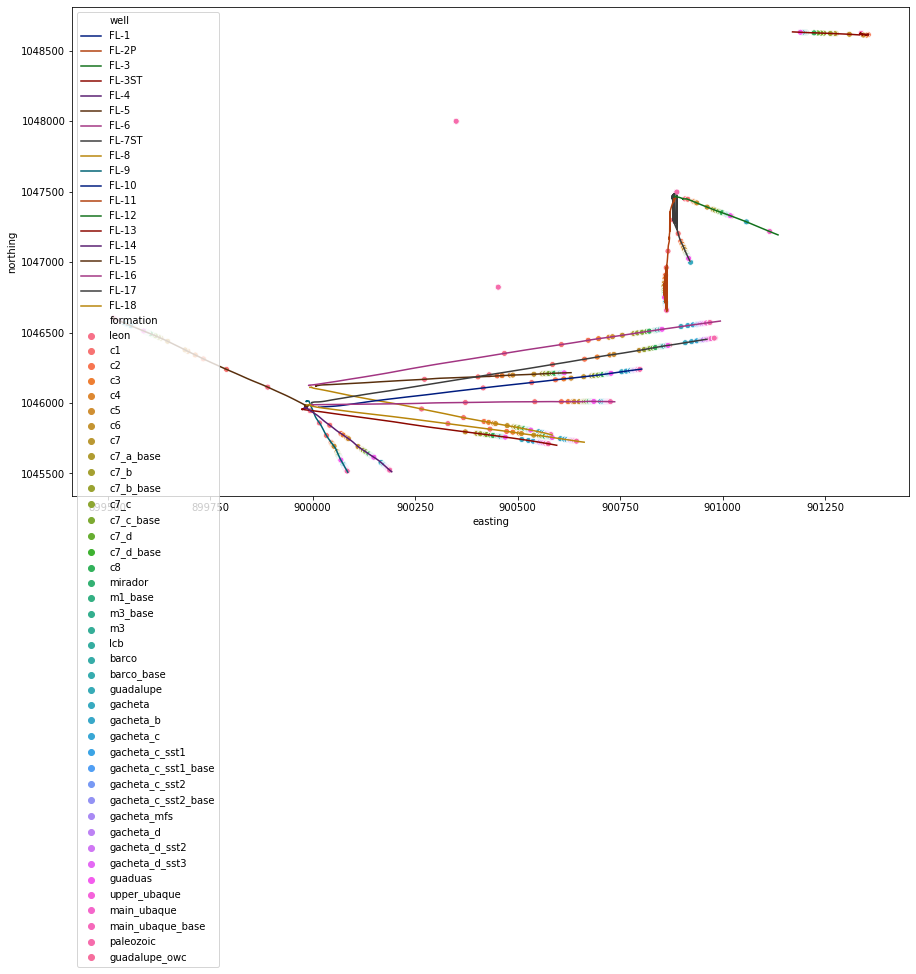

In [13]:

fig, ax = plt.subplots(figsize=(15,9))
sns.lineplot(x='easting', y='northing', data=fl.wells_surveys(), hue='well',palette='dark',ax=ax)
sns.scatterplot(x='easting',y='northing',data=fl.wells_tops(), hue='formation', ax=ax)

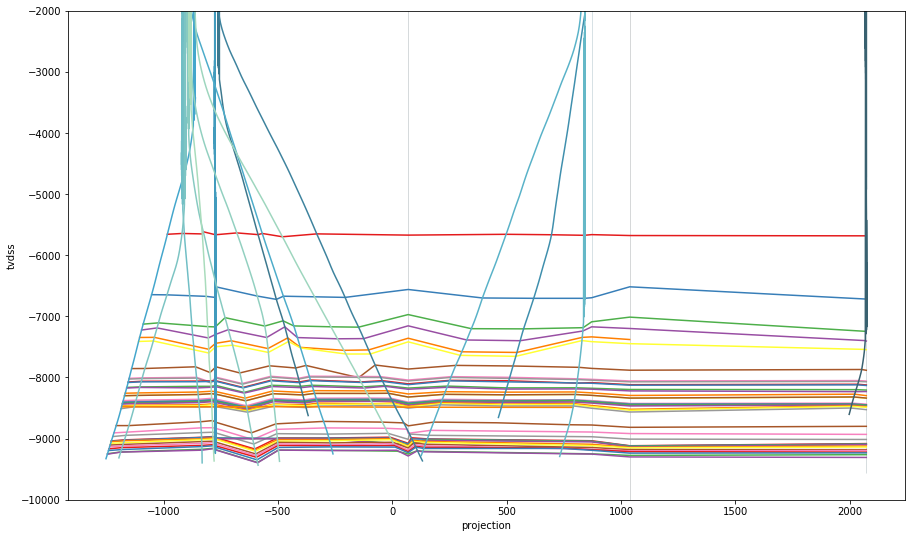

In [31]:
fig,ax = plt.subplots(figsize=(15,9))
fl.structural_view(azi=30,ax=ax,legend=False, ylims=[-2000,-10000])

In [24]:
str_vtk = fl.structural_view_vtk()


In [29]:
p = pv.Plotter(notebook=False)
p.add_mesh(str_vtk,scalars=values)
p.set_scale(zscale=0.5)
p.show()

NameError: name 'values' is not defined

In [27]:
dir(str_vtk)

['ALL_PIECES_EXTENT',
 'AddObserver',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'CELL',
 'CELL_DATA_VECTOR',
 'CURRENT_PROCESS_CAN_LOAD_BLOCK',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DeepCopy',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'FIELD',
 'FIELD_ACTIVE_ATTRIBUTE',
 'FIELD_ARRAY_TYPE',
 'FIELD_ASSOCIATION',
 'FIELD_ASSOCIATION_CELLS',
 'FIELD_ASSOCIATION_EDGES',
 'FIELD_ASSOCIATION_NONE',
 'FIELD_ASSOCIATION_POINTS',
 'FIELD_ASSOCIATION_POINTS_THEN_CELLS',
 'FIELD_ASSOCIATION_ROWS',
 'FIELD_ASSOCIATION_VERTICES',
 'FIELD_ATTRIBUTE_TYPE',
 'FIELD_NAME',
 'FIELD_NUMBER_OF_COMPONENTS',
 'FIELD_NUMBER_OF_TUPLES',
 'FIELD_OPERATION',
 'FIELD_OPERATION_MODIFIED',
 'FIELD_OPERATION_PRESERVED',
 'FIELD_OPERATION_REINTE